In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

Прочитаем данные Airbnb по жилью, которое можно арендовать. 

In [54]:
df = pd.read_csv("data/airbnb.csv")

In [55]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Нас интересует ширина и долгота арендного жилья, и стоимость аренды. 
Рассмотрим, кластеризацию по 2 признакам, а именно, выделим группы жилья по локации.
А для 3D признака еще добавим к текущим признакам цену и рассмотрим, как локация влияет на цену, визуализируем результаты.

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

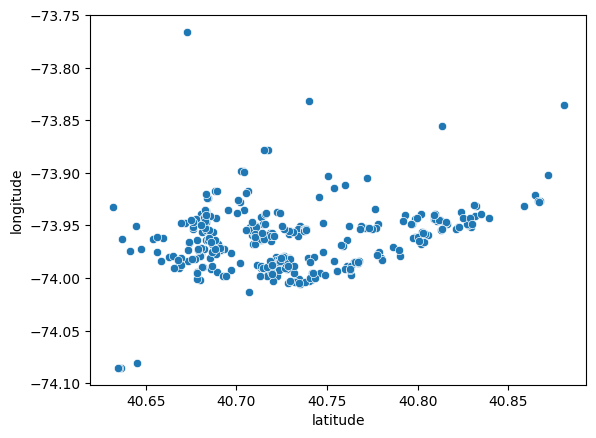

In [56]:
sns.scatterplot(df.latitude, df.longitude)

In [57]:
# инициализируем k-means кластеризацию с 6 кластерами
kmeans_clustering = KMeans(n_clusters=6, random_state=42)
# обучим k-means модель кластеризации на данных о широте и долготе, сохраним данные о кластерах для этих данных в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])
# сохраним предсказания в колонку clusters датафрейма
df['clusters'] = predictions
display(df)

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,4
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,89427,The Brooklyn Waverly,116599,Sahr,Brooklyn,Clinton Hill,40.68613,-73.96536,Entire home/apt,650,5,0,NaN,NaN,3,365,2
346,89621,"WONDERFUL, COMFORTABLE STUDIO",209460,Marylyn,Brooklyn,Bedford-Stuyvesant,40.68048,-73.94911,Entire home/apt,90,3,218,2019-06-28,2.26,4,324,2
347,93313,MAISON DES SIRENES 2,25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68314,-73.93963,Entire home/apt,120,2,75,2019-06-23,0.76,2,237,2
348,94035,"Modern, Safe, Clean, Bright Room in Astoria for 2",35375,Savannah,Queens,Astoria,40.75961,-73.91117,Private room,80,1,42,2019-07-06,1.21,2,365,5


In [58]:
# с помощью метода cluster_centers_ найдем координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_
display(centroids)
# для 6 кластеров сохраним в отдельные списоки значения координат x и y
centroids_x = [i[0] for i in centroids ]
centroids_y = [i[1] for i in centroids ]

display(centroids_x, centroids_y)

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, для того, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся 6 раз, так как у нас 6 кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    #сохраняем в словарь номер кластера в качестве ключа, значение цвета в качестве значения
    colors_dict[i] = colors[i]
    
display(centroids_x_dict)   

array([[ 40.71634493, -73.94930478],
       [ 40.81043535, -73.94805887],
       [ 40.67793717, -73.96783737],
       [ 40.637372  , -74.084466  ],
       [ 40.73324723, -73.98940394],
       [ 40.73371   , -73.87826833]])

[40.716344927536234,
 40.81043535211268,
 40.67793717171717,
 40.637372,
 40.73324723404255,
 40.73371]

[-73.94930478260869,
 -73.94805887323943,
 -73.96783737373737,
 -74.08446599999999,
 -73.9894039361702,
 -73.87826833333334]

{0: 40.716344927536234,
 1: 40.81043535211268,
 2: 40.67793717171717,
 3: 40.637372,
 4: 40.73324723404255,
 5: 40.73371}

Создадим новые столбцы (cen_x, cen_y, color) в датафрейме. В зависимости от того, какое значение в ячейке clusters в ячейке cen_x, cen_y и color будут разные значения. Если кластер 0, то в cen_x и cen_y будут координаты центроида нулевого кластера и цвет нулевого кластера. 

In [59]:
df['cen_x'] = df['clusters'].map(centroids_x_dict)
df['cen_y'] = df['clusters'].map(centroids_y_dict)
df['color'] = df['clusters'].map(colors_dict)

In [60]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2,40.677937,-73.967837,#2095DF
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,4,40.733247,-73.989404,#20DFC5
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,40.810435,-73.948059,#81DF20
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2,40.677937,-73.967837,#2095DF
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,40.810435,-73.948059,#81DF20


## Визуализация кластеров

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

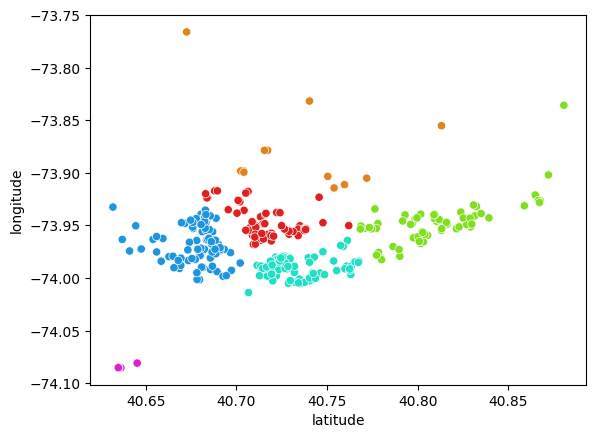

In [61]:
#sns.scatterplot(df.latitude, df.longitude, c=df.color, alpha=0.2, s=170)
#sns.scatterplot(df.latitude, df.longitude, c=df.clusters)
sns.scatterplot(df.latitude, df.longitude, c=df.color)

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

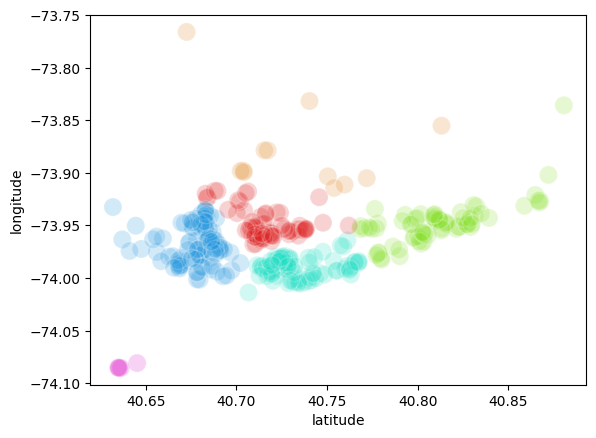

In [62]:
sns.scatterplot(df.latitude, df.longitude, c=df.color, alpha=0.2, s=170)

## Визуализация центроидов 

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

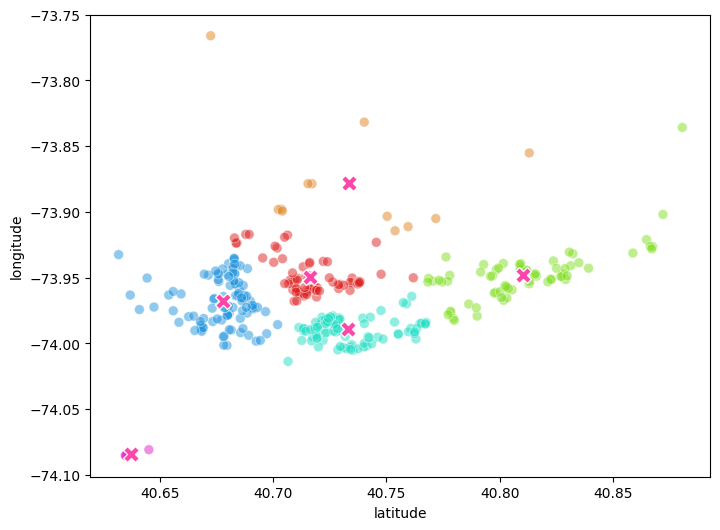

In [65]:
fig, axes = plt.subplots(1, figsize=(8,6))
# визуализируем элементы датасета
# параметр c отвечает за то, что у элемента в зависимости от того, какому кластеру он принедлежит будет свой цвет
# s ответчает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(df.latitude, df.longitude, c=df.color, alpha=0.5, s=50)
# визуализируем центроиды, их отметим на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(centroids_x, centroids_y, marker='X', c=['#FC46AA'], s=130)

## Convex Hull

Для построения выпуклой оболочки для каждого кластера воспользуемся библиотекой scipy и модулем ConvexHull.
ConvexHull на вход принимает значения признаков объектов, для которых нужно построит выпуклую оболочку. 
Индексы точек из points, которые образуют вершины выпуклой оболочки можно получить с помощью метода vertices:


points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

И мы получим списк из значений координат [0, 4, 3, 2]
После этого мы можем найти координаты этих точек из списка points.

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


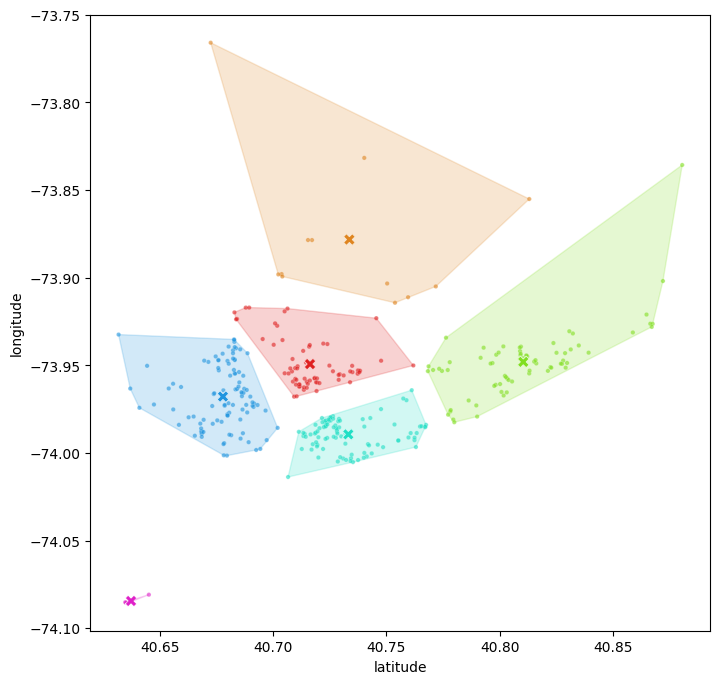

In [67]:
from scipy.spatial import ConvexHull 
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
sns.scatterplot(df.latitude, df.longitude, c=df.color, alpha=0.6, s=10)
sns.scatterplot(centroids_x, centroids_y, marker='X', c=colors, s=70)

# найдем уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы принадлежащие i-му кластеру
    points = df[df['clusters'] == i][['latitude', 'longitude']].values
    hull = ConvexHull(points)
    #display(points[hull.vertices])     
    
    # запишем координаты оболочки по оси x. Из hull.vertices мы узнаем индексы элементов, входящих в оболочку
    # так как оболочка должна быть замкнутой, то в конце добавляем еще раз нулевой элемент
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])

    #display(y_hull)
    # рисуем оболочку и заливаем ее таким же цветом как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])



## Дендрограммы 

In [68]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single') 

# обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])


Как мы уже знаем, результаты иерархической кластеризации можно представить в виде дендрограммы. Теперь научимся рисовать дендрограммы с предсказаниями. Для этого нам понадобится библиотека scipy и модули dendrogram и linkage.
linkage - это способ подсчета расстояния между двумя кластерами.
В переменной method можно задать разные способы подсчета рассчета расстояния: single, complete, average, weighted, centroid, median, ward.

Функция dendrogram строит дендрограмму, основываясь на информацию о расстоянии объектов, полученную из функции linkage, данная информация позволит строить ветви дендрограммы разной высоты.
Рассмотрим одни из наиболее важных переменных, которые принимает функция dendrogram:
- параметр Z - расстояния до объектов кластеров, полученные из функции linkage;
- orientation - ориентация дендрограммы. Данный параметр может принимать значения top, bottom, left, right;
- labels - список с предсказаниями, к какому кластеру какой объект относится
- distance_sort - определяет в каком порядке будут визуализированы кластеры. ascending или True означает, что сначала отрисовывается пара кластеров с наибольшим расстоянием между ними. descending или False означает, что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.


array([[5.70000000e+01, 1.10000000e+02, 4.47213596e-05, 2.00000000e+00],
       [2.30000000e+01, 1.84000000e+02, 7.28010989e-05, 2.00000000e+00],
       [2.49000000e+02, 2.51000000e+02, 2.01246118e-04, 2.00000000e+00],
       ...,
       [2.61000000e+02, 6.95000000e+02, 6.67533827e-02, 3.44000000e+02],
       [6.71000000e+02, 6.96000000e+02, 8.61277220e-02, 3.49000000e+02],
       [1.96000000e+02, 6.97000000e+02, 9.43886736e-02, 3.50000000e+02]])

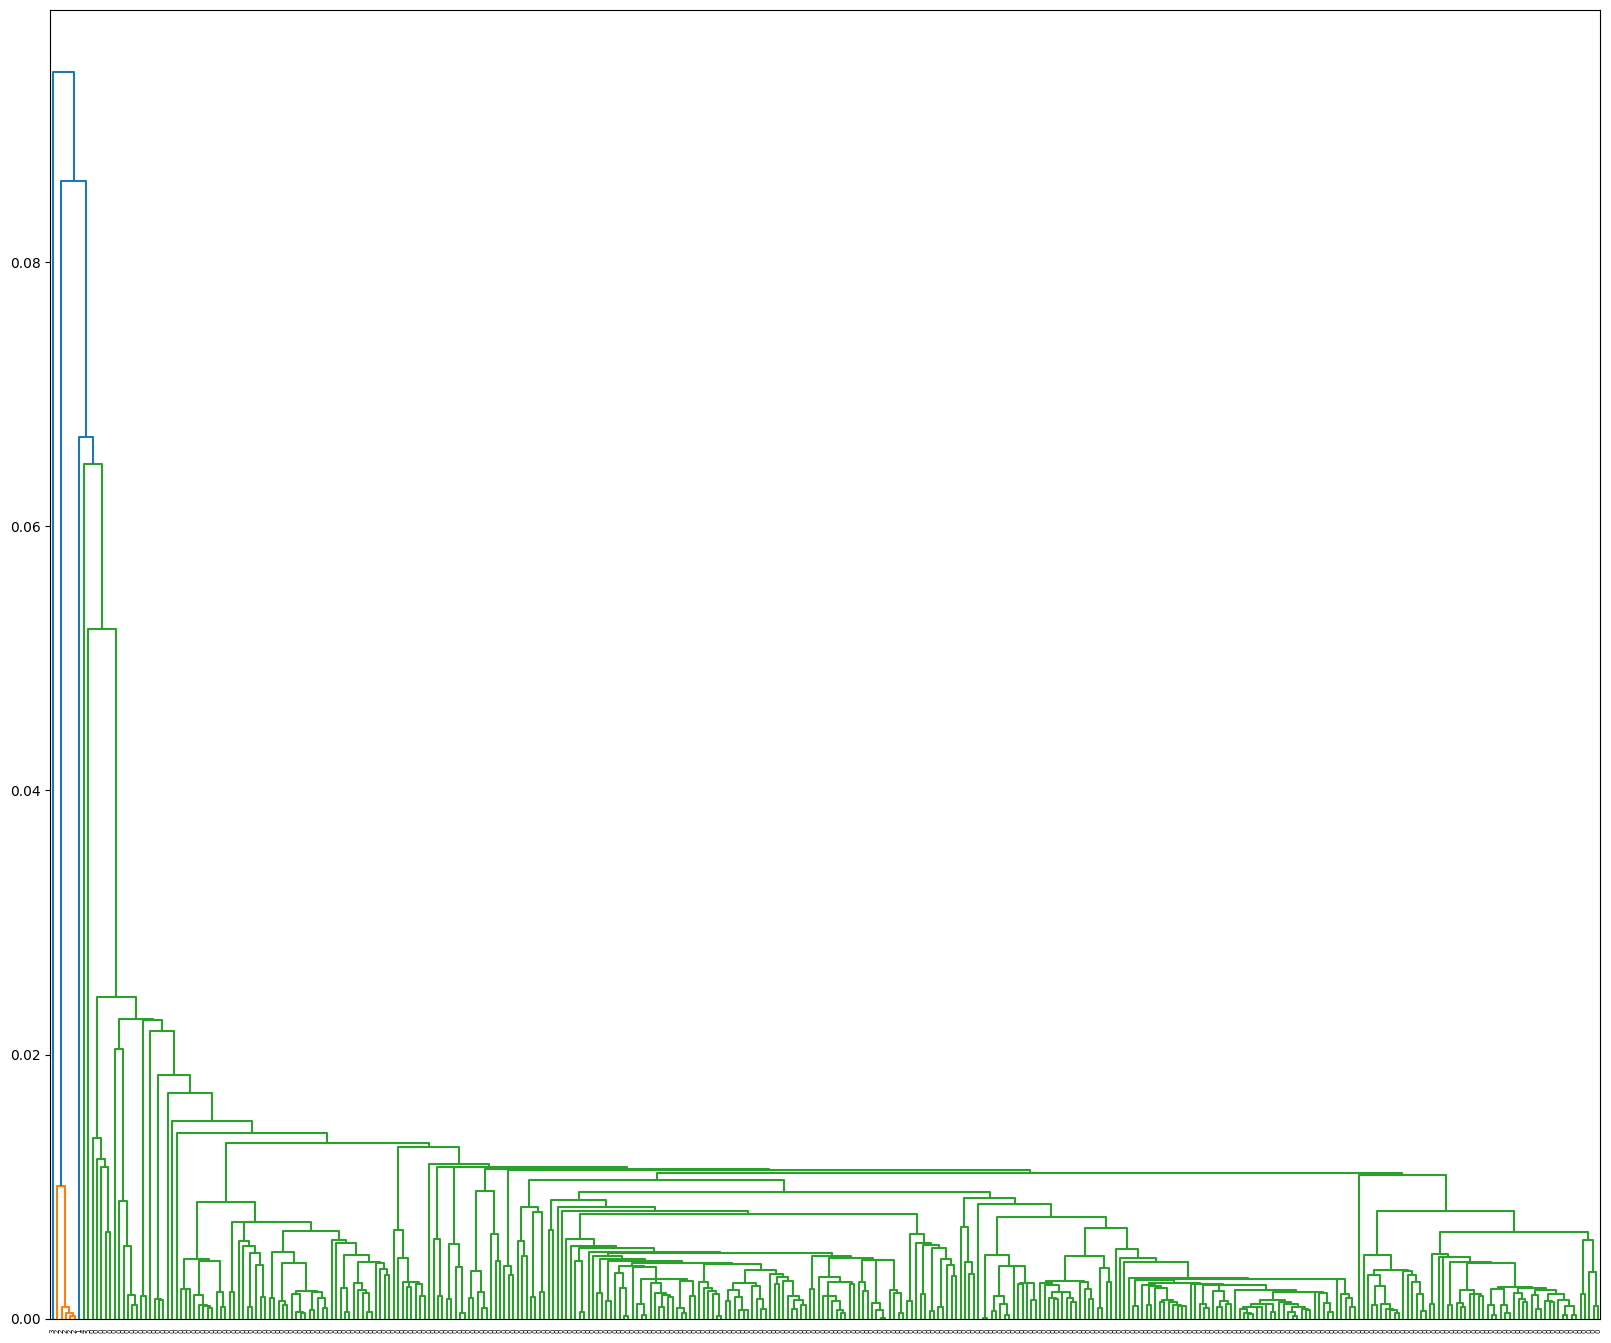

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# расссчитаем расстояния между кластерами
linked = linkage(df[['latitude', 'longitude']], 'single')
display(linked)

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между друг другом
dendrogram(Z=linked,
           orientation="top",
           labels = predictions_ag_model,
           distance_sort = 'desceding' 
           )
plt.show()

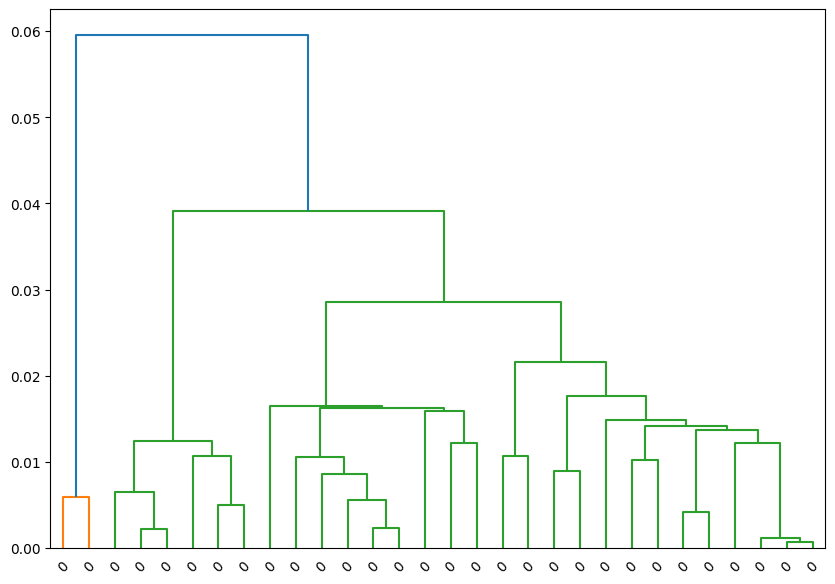

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


linked = linkage(df[:30][["latitude", "longitude"]], 'single')

plt.figure(figsize=(10, 7))

dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model[:30],
            distance_sort='ascending')

plt.show()

## Clustergram визуализация

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.026381254196166992 seconds.
K=3 fitted in 0.029314517974853516 seconds.
K=4 fitted in 0.032245635986328125 seconds.
K=5 fitted in 0.03615427017211914 seconds.
K=6 fitted in 0.03615427017211914 seconds.
K=7 fitted in 0.03615450859069824 seconds.


c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

K=8 fitted in 0.03810858726501465 seconds.


<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

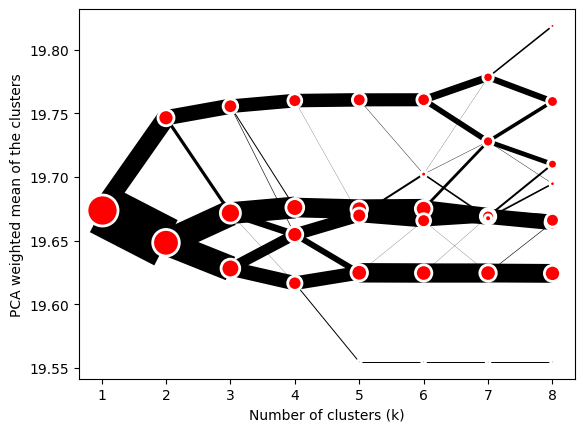

In [80]:
from clustergram import Clustergram

# задаем количество кластеров, для которого хотим получить визуализиацию
cgram = Clustergram(range(1,9), method='kmeans')
# запускаем алгоритм
cgram.fit(df[['latitude', 'longitude']])
cgram.plot()

## 3D визуализация

In [82]:
# инициализируем k-means кластеризацию с 6 кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means модель кластеризации на данных широты, долготы и цене, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df['cluster_3d'] = kmeans_predictions

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color,clusters_3d,cluster_3d
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,2,40.677937,-73.967837,#2095DF,4,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,4,40.733247,-73.989404,#20DFC5,2,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaN,NaN,1,365,1,40.810435,-73.948059,#81DF20,4,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,2,40.677937,-73.967837,#2095DF,0,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,1,40.810435,-73.948059,#81DF20,0,3


Text(0.5, 0, 'price')

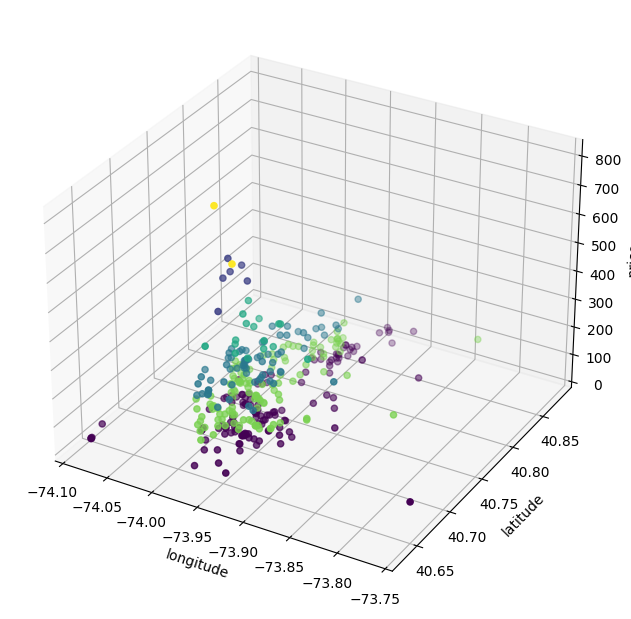

In [90]:
from mpl_toolkits.mplot3d import Axes3D

# создаем трехмерный объект
fig = plt.figure(figsize=(6,6))
# добавитм дольнительную ось в объект картинки
ax = Axes3D(fig)
fig.add_axes(ax)


# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude, df.latitude, df.price, c=df.clusters_3d)

# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Text(0.5, 0, 'price')

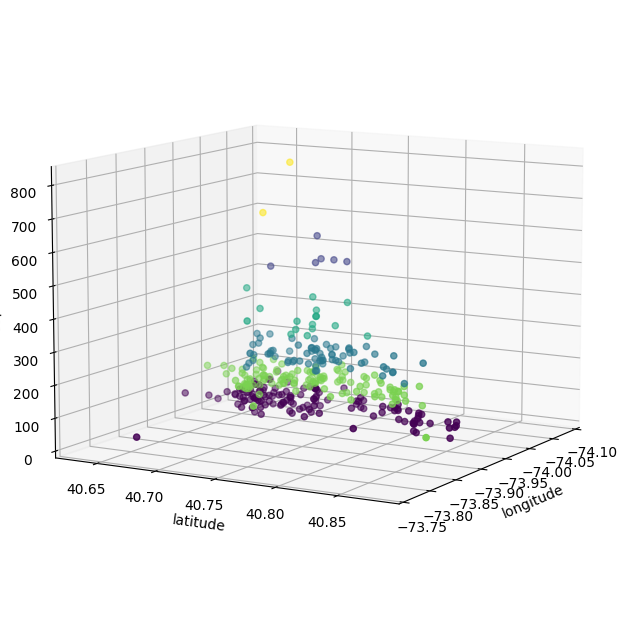

In [92]:
from mpl_toolkits.mplot3d import Axes3D

# создаем трехмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавитм дольнительную ось в объект картинки
fig.add_axes(ax)


ax.azim = 30
ax.elev = 10


# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [93]:
import plotly
import plotly.express as px

fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters_3d', 

    width=1000,
    height=700
)

fig.show()

 Задание 8.4
0/1 point (graded)

Для датасета Airbnb проведите иерархическую агломеративную кластеризацию с использованием sklearn. В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

Визуализируйте дендрограмму для проведённой кластеризации. На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

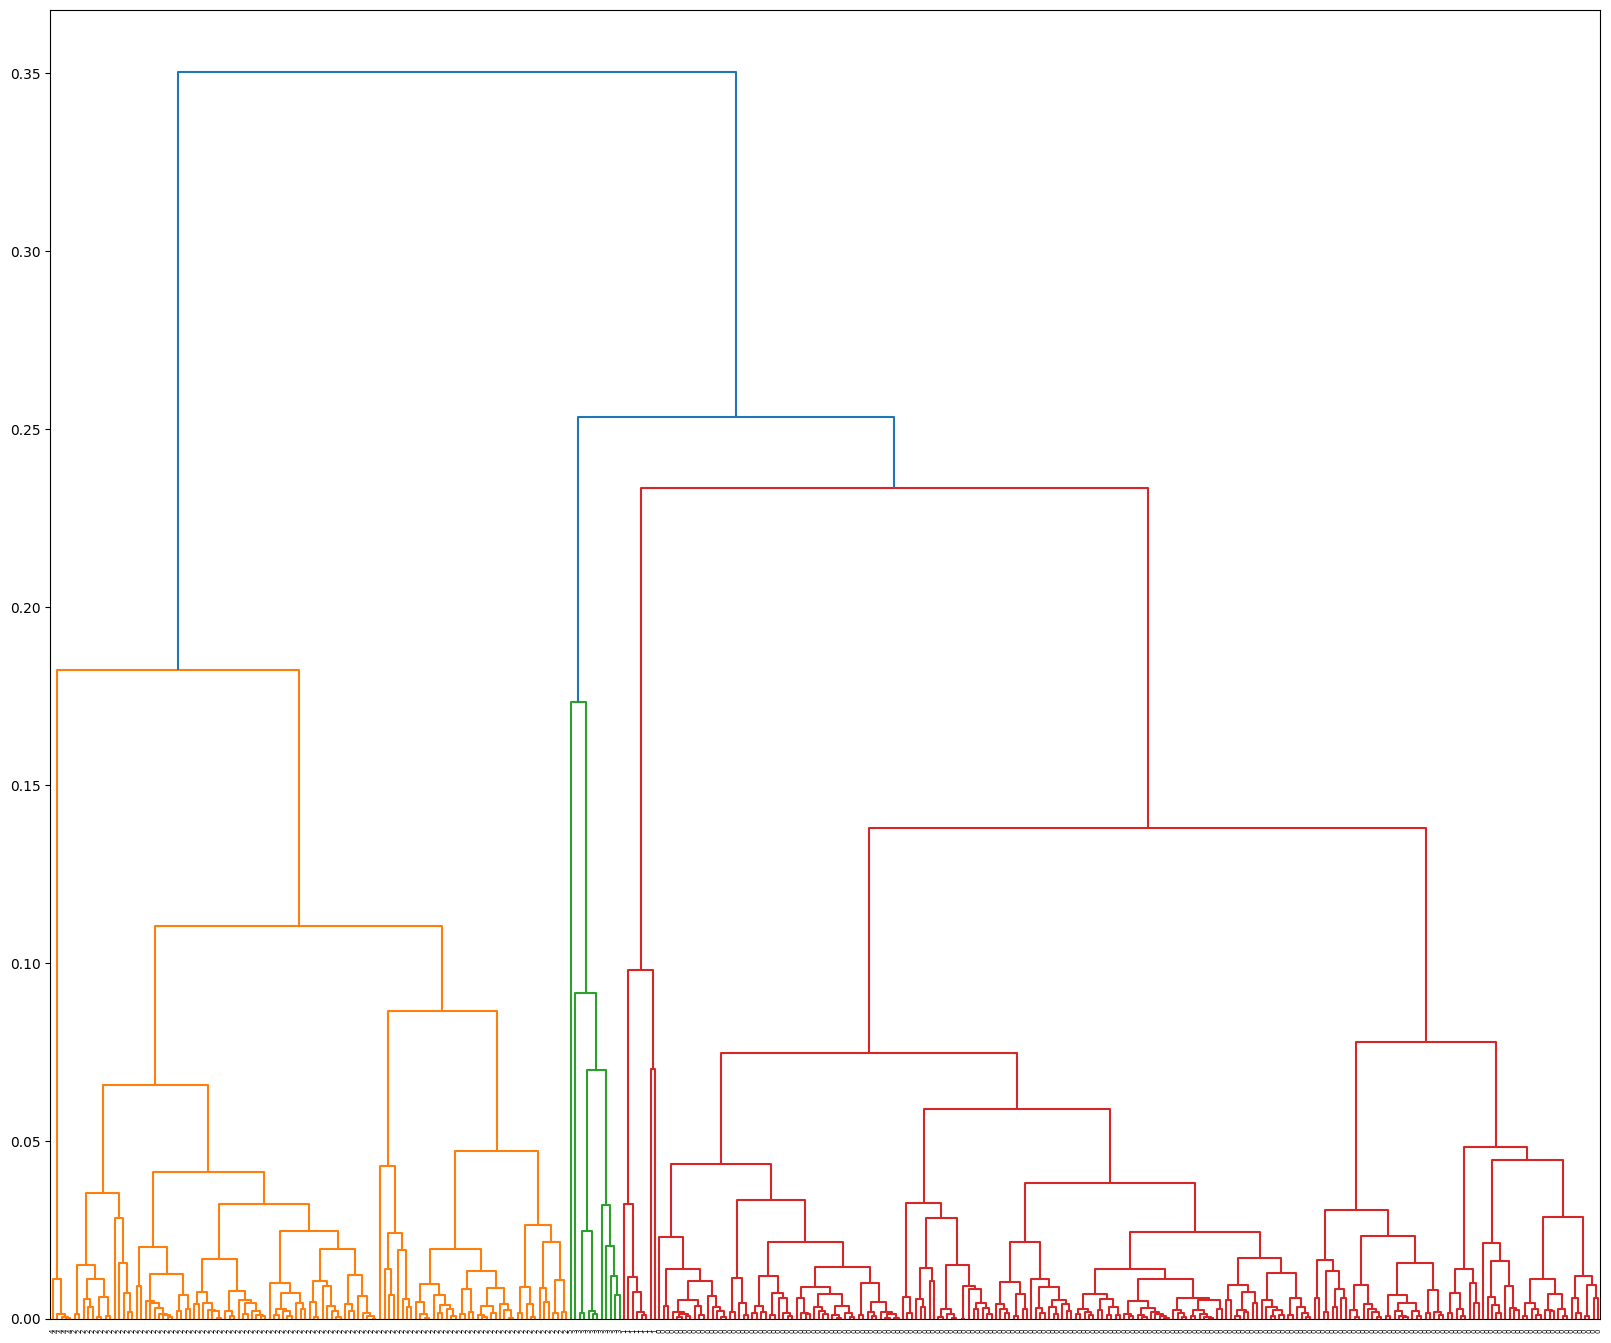

In [94]:
# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete') 

# обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

# расссчитаем расстояния между кластерами
linked = linkage(df[['latitude', 'longitude']], 'complete')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между друг другом
dendrogram(Z=linked,
           orientation="top",
           labels = predictions_ag_model,
           distance_sort = 'desceding' 
           )
plt.show()

Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.

Визуализируйте результаты. Сколько кластеров получилось на графике?

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



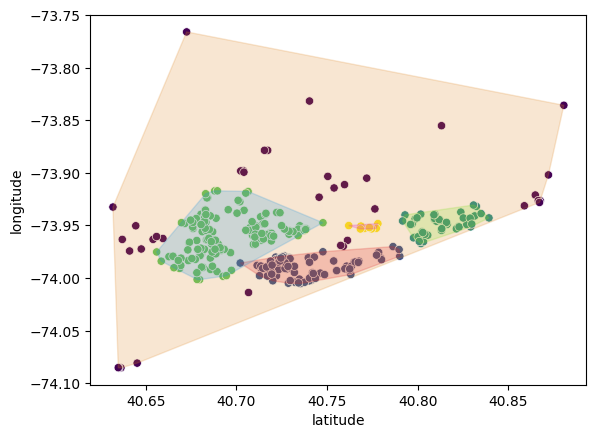

In [99]:
from sklearn.cluster import DBSCAN

dbscan_clus = DBSCAN(eps=0.012, min_samples=6)
#dbscan_clus.fit_predict(df[['latitude', 'longitude']])
predictions = dbscan_clus.fit_predict(df[['latitude', 'longitude']])
df['clusters'] = predictions

sns.scatterplot(df.latitude, df.longitude, c=predictions)

# найдем уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df['clusters'].unique():
    # запишем в points значения признаков широты и долготы принадлежащие i-му кластеру
    points = df[df['clusters'] == i][['latitude', 'longitude']].values
    hull = ConvexHull(points)
    #display(points[hull.vertices])     
    
    # запишем координаты оболочки по оси x. Из hull.vertices мы узнаем индексы элементов, входящих в оболочку
    # так как оболочка должна быть замкнутой, то в конце добавляем еще раз нулевой элемент
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])

    #display(y_hull)
    # рисуем оболочку и заливаем ее таким же цветом как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])